In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('train.csv', usecols=['Age','Fare','Survived'])

In [3]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


## Random sample imptutaion

Takes random observations from dataset and use it to replace NaN values 

When to use? When Data is MCAR

In [4]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [5]:
#get percentage
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [6]:
#choosing a random value 
a1=df['Age'].dropna().sample()
a1

352    15.0
Name: Age, dtype: float64

In [7]:
median = df['Age'].median()
median

28.0

In [8]:
#fnc to replace nan
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
   

In [9]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample


In [10]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [11]:
impute_nan(df,'Age',28)

In [12]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [13]:
df.isnull().sum()

Survived        0
Age           177
Fare            0
Age_median      0
Age_random      0
dtype: int64

In [14]:
import matplotlib.pyplot as plt 
import seaborn as sns

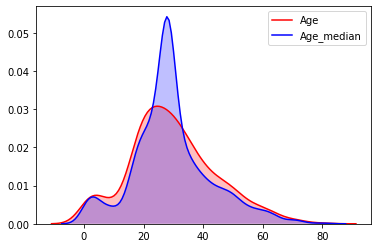

In [15]:
#kde - kernal density estimator 
p1=sns.kdeplot(df['Age'], shade=True, color="r")
p1=sns.kdeplot(df['Age_median'], shade=True, color="b")

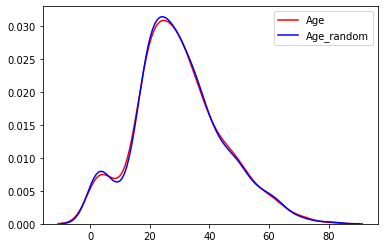

In [16]:
p1=sns.kdeplot(df['Age'], shade=False, color="r")
p1=sns.kdeplot(df['Age_random'], shade=False, color='b')

In mean-median, variance was getting distorted, not in this case

adv: no variance distortion | disadv:does not work in all situations but with business scenarios this might not be useful

## Capture NaN with new feature/variable

When to use? If the data is not MNAR i.e. some relation between missing values and the values that are present

In [17]:
df=pd.read_csv('train.csv', usecols=['Age','Fare','Survived'])

In [18]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [19]:
df['Age_nan'] = np.where(df['Age'].isnull(),1,0)

In [20]:
df.head()

,Survived,Age,Fare,Age_nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


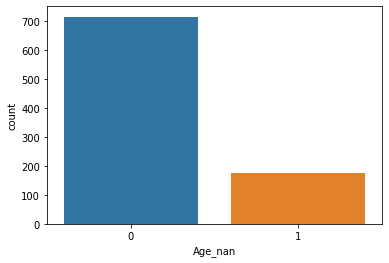

In [21]:
sns.countplot(df['Age_nan'])

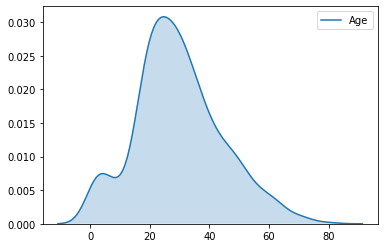

In [22]:
sns.kdeplot(df['Age'], shade=True)

In [23]:
#wanted to check outliers 

# from scipy.stats import kurtosis
# from scipy.stats import skew

# df['Age'].dropna(inplace=True)

# kurtosis(df['Age'])

# skew(df['Age'])

    If skewness is less than −1 or greater than +1, the distribution is highly skewed.
    If skewness is between −1 and −½ or between +½ and +1, the distribution is moderately skewed.
    If skewness is between −½ and +½, the distribution is approximately symmetric.

adv: here we provide additional col that will highlight missing values i.e. highlights importance of missing values | disadv: creates more features and can lead to data explosion/curse of dimensionality if done for more features 

## End of Distribution Imputation 

In [24]:
df=pd.read_csv('train.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


C:\Users\Jay\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Jay\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


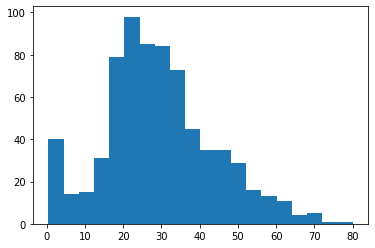

In [27]:
plt.hist(df['Age'], bins=20)
plt.show()

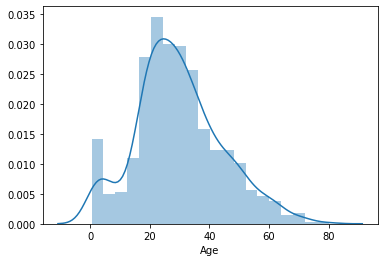

In [33]:
sns.distplot(df['Age'])

In [28]:
df['Age'].mean()

29.69911764705882

In [31]:
df['Age'].std()

14.526497332334044

In [32]:
df['Age'].mean() + 3*df['Age'].std()

73.27860964406095

End of distribution -> data after the 3rd Standard deviation 

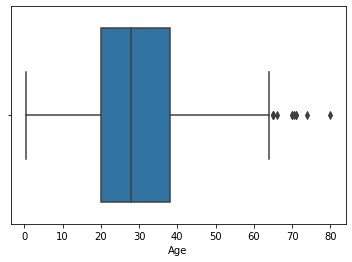

In [34]:
sns.boxplot(df['Age'])

In 'End of Distribution' we choose the outliers and use them to fill NA in the data 

In [35]:
df['Age_ed'] = df['Age']

In [41]:
#replacing NA with outliers 
df['Age_ed'].fillna(73.27, inplace=True)

In [43]:
df[df['Age'].isnull()].head()

,Survived,Age,Fare,Age_ed
5,0,NaN,8.4583,73.27
17,1,NaN,13.0000,73.27
19,1,NaN,7.2250,73.27
26,0,NaN,7.2250,73.27
28,1,NaN,7.8792,73.27


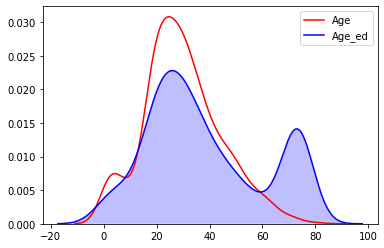

In [47]:
p1=sns.kdeplot(df['Age'], shade=False, color="r")
p1=sns.kdeplot(df['Age_ed'], shade=True, color='b')

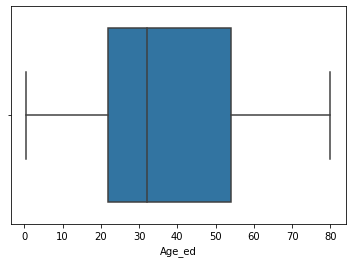

In [46]:
#no outliers!
sns.boxplot(df['Age_ed'])